In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt


class Data:
    def __init__(self):
        self.iris = load_iris()
        self.x = self.iris.data
        self.y = self.iris.target

    def transform(self, category: 'int' = 0, split: 'float' = .2):
        y = map(lambda x: 1 if x == category else 0, self.y)
        y = list(y)
        y = np.array(y)
        n = len(y)
        perm = np.random.permutation(n)
        i = int(100 * split)
        xtr, xte = self.x[perm][i:], self.x[perm][:i]
        ytr, yte = y[perm][i:], y[perm][:i]
        return xtr, xte, ytr, yte



In [82]:
xtr, xte, ytr, yte = Data().transform()
xtr = xtr[:,:2]
xte = xte[:,:2]

In [83]:
xtr.shape

(130, 2)

In [84]:
ytr

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

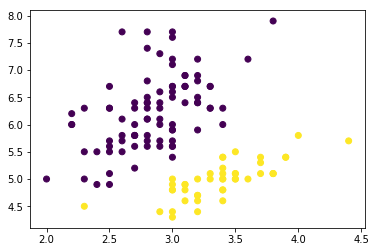

In [85]:
plt.scatter(xtr[:,1],xtr[:,0], c=ytr)
plt.show()

In [86]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def loss(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

In [186]:
w = np.zeros((2, 1))
b = np.zeros((1, 1))

m = len(ytr)
ytr = ytr.reshape(-1, 1)

learning_rate = 0.01
epoch = 1
for e in range(epoch):
    wx = np.matmul(xtr, w) + b
    h = sigmoid(wx)
    l = loss(ytr, h)
    dz = wx - ytr
    dw = np.matmul(xtr.T, dz) / m
    db = sum(dz)

    w = w - dw * learning_rate
    b = b - db * learning_rate
print(l)

0.6931471805599453


In [204]:
epoch = 100
for e in range(epoch):
    wx = np.matmul(xtr, w) + b
    h = sigmoid(wx)
    l = loss(ytr, h)
    dz = wx - ytr
    dw = np.matmul(xtr.T, dz) / m
    db = sum(dz)

    w = w - dw * learning_rate
    b = b - db * learning_rate
print(l)

0.6896575059814449


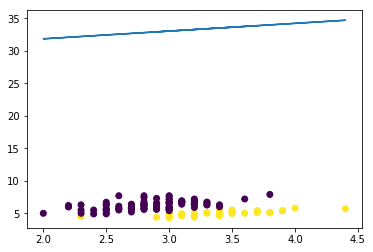

In [203]:
k = -w[0]/w[1]
a = k*xtr[:,1] + b/w[1]/.4

plt.scatter(xtr[:,1],xtr[:,0], c=ytr.reshape(130))
plt.plot(xtr[:,1], a.reshape(130))

plt.show()

In [159]:
np.log(1)

0.0

In [166]:
epoch = 2000
for e in range(epoch):
    wx = np.matmul(xtr, w) + b
    h = sigmoid(wx)
    l = loss(ytr, h)
    dz = wx - ytr
    dw = np.matmul(xtr.T, dz) / m
    db = sum(dz)

    w = w - dw * learning_rate
    b = b - db * learning_rate
print(l)

0.6095180539946762


In [167]:
k = -w[0]/w[1]


In [168]:
k

array([0.64445108])

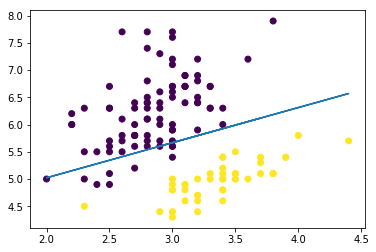

In [185]:
k = -w[0]/w[1]
a = k*xtr[:,1] + b/w[1]/.35

plt.scatter(xtr[:,1],xtr[:,0], c=ytr.reshape(130))
plt.plot(xtr[:,1], a.reshape(130))
plt.show()

In [171]:
ytr.shape

(130, 1)

In [173]:
sum(ytr)/130

array([0.33846154])

In [181]:
1-0.33846154

0.66153846

In [183]:
p=.65
prd = []
for i in h:
    if i > p:
        prd.append(1)
    else:
        prd.append(0)
print('\naccuracy:')
print(accuracy_score(ytr, prd))
print('\nf1:')
print(f1_score(ytr, prd))


accuracy:
0.9923076923076923

f1:
0.9885057471264368
